<font face="Calibri" size="5"><center>Análisis y Visualización de Datos del Conjunto de Datos</center></font>
<font face="Calibri" size="5"><center>"Superstore"</center></font>

<font face="Times New Roman" size="4"><center>El presente notebook tiene como objetivo llevar a cabo un análisis exploratorio y visualización de datos utilizando el conjunto de datos "Superstore". Este conjunto de datos proporciona información sobre las ventas y transacciones de una tienda minorista a lo largo del tiempo. El análisis se enfocará en comprender mejor las tendencias de ventas, identificar patrones de compra y obtener conocimientos valiosos para la toma de decisiones comerciales.</center></font>

<font face="Times New Roman" size="4"><center>El conjunto de datos incluye una variedad de características, como ventas, beneficios, descuentos, categorías de productos, ubicaciones geográficas y más. Durante este análisis, exploraremos aspectos clave de los datos para responder a preguntas fundamentales y formular nuevas preguntas de interés.</center></font>

<font face="Times New Roman" size="4">Preguntas de Interés:</font>
<font face="Times New Roman" size="4">
- ¿Cuál es la tendencia general de las ventas a lo largo del tiempo?
- ¿Cuáles son las categorías de productos más vendidas y más rentables?
- ¿Existe una correlación entre el precio de venta y el margen de ganancia?-
- ¿Cuál es la distribución geográfica de las ventas y cómo varían en diferentes regiones?
- ¿Cuál es el margen de ganancia por región o ubicación geográfica?:
- ¿Cuáles son los productos con los márgenes de ganancia más altos y más bajos?
- Análisis de series temporales de ventas, ganancias y cantidad vendida.
- ¿Cómo se distribuyen los clientes por segmento (por ejemplo, corporativos, individuales)?
- ¿Cuál es la diferencia en las tendencias de compra entre clientes corporativos y clientes individuales?
- ¿Cuál es el margen de ganancia promedio por segmento de cliente?
- ¿Cuál es el producto más popular entre los clientes corporativos y los individuales?
- ¿Cómo varía la respuesta a descuentos entre los segmentos de clientes?
- ¿Cuál es la frecuencia de compra por producto en cada segmento?
 </font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import statsmodels.api as sm1
import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


df_DataSet = pd.read_excel('https://github.com/eliasruizbone/Coder-DS/raw/main/DataSet/SuperTiendas/Supertiendas-RuizboneElias.xlsx', engine='openpyxl')

In [3]:
# Cambiando los nombres de las columnas
nuevos_nombres = {
    'Row ID': 'ID',
    'Order ID': 'ID_Pedido',
    'Order Date': 'Fecha_Pedido',
    'Ship Date': 'Fecha_Envio',
    'Ship Mode': 'Modo_Envio',
    'Customer ID': 'ID_Cliente',
    'Customer Name': 'Nombre_C',
    'Segment': 'Segmento_C',
    'Country': 'Pais_C',
    'City': 'Ciudad_C',
    'State': 'Estado_C',
    'Postal Code': 'Codigo_Postal',
    'Region': 'Region_C',
    'Product ID': 'ID_Producto',
    'Category': 'Categoria',
    'Sub-Category': 'SubCategoria',
    'Product Name': 'Producto',
    'Sales': 'Ventas',
    'Quantity': 'Cantidad_Vendida',
    'Discount': 'Descuento',
    'Profit': 'Ganancias',
  
}

df_DataSet.rename(columns=nuevos_nombres,inplace=True)
df_DataSet

,ID,ID_Pedido,Fecha_Pedido,Fecha_Envio,Modo_Envio,ID_Cliente,Nombre_C,Segmento_C,Pais_C,Ciudad_C,...,Codigo_Postal,Region_C,ID_Producto,Categoria,SubCategoria,Producto,Ventas,Cantidad_Vendida,Descuento,Ganancias
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df_DataSet['Año'] = df_DataSet['Fecha_Pedido'].dt.year
df_DataSet['Mes'] = df_DataSet['Fecha_Pedido'].dt.month
df_VentasAños = df_DataSet.groupby('Año')['Ventas'].sum().reset_index()
df_VentasAños['Ventas'] = df_VentasAños['Ventas'].round(2)
df_VentasAños
df_DataSet


,ID,ID_Pedido,Fecha_Pedido,Fecha_Envio,Modo_Envio,ID_Cliente,Nombre_C,Segmento_C,Pais_C,Ciudad_C,...,ID_Producto,Categoria,SubCategoria,Producto,Ventas,Cantidad_Vendida,Descuento,Ganancias,Año,Mes
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2


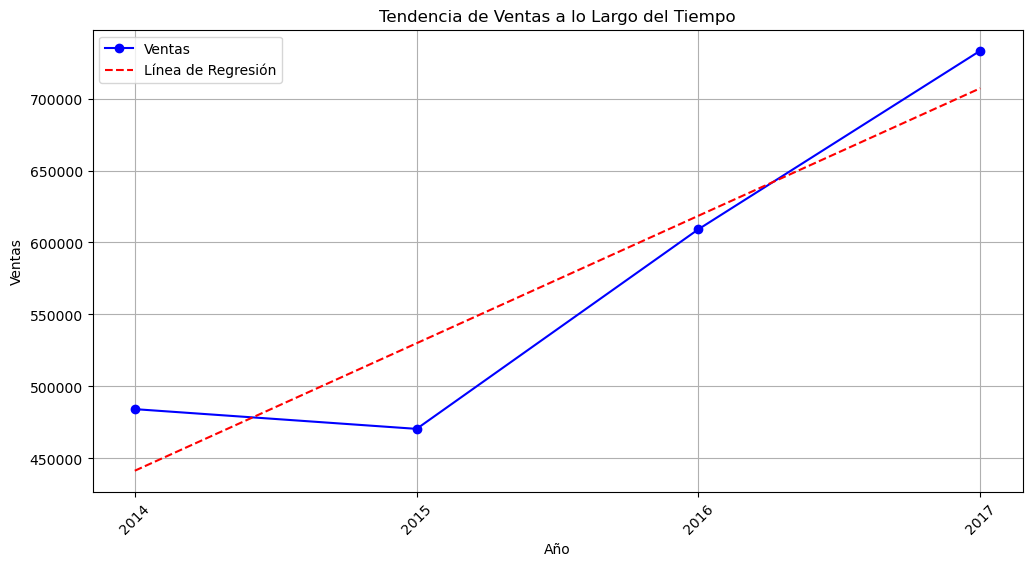

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     12.78
Date:                Mon, 25 Sep 2023   Prob (F-statistic):             0.0701
Time:                        19:58:45   Log-Likelihood:                -47.978
No. Observations:                   4   AIC:                             99.96
Df Residuals:                       2   BIC:                             98.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.779e+08   4.99e+07     -3.563      0.0

C:\Users\elias\Anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\elias\Anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [5]:
coeficiente = np.polyfit(df_VentasAños['Año'], df_VentasAños['Ventas'], 1)
linea_regresion = np.poly1d(coeficiente)


plt.figure(figsize=(12, 6))
plt.plot(df_VentasAños['Año'], df_VentasAños['Ventas'], marker='o', linestyle='-', color='b', label='Ventas')
plt.plot(df_VentasAños['Año'], linea_regresion(df_VentasAños['Año']), linestyle='--', color='r', label='Línea de Regresión')
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(df_VentasAños['Año'], rotation=45, fontsize=10) 
plt.grid(True)
plt.legend()
plt.show()


# para crear el modelo.
# defino las variables independiente (X) y dependiente (y)
X = df_VentasAños['Año']  
y = df_VentasAños['Ventas']  
X = sm1.add_constant(X)# agrego una constante al modelo 
modelo = sm1.OLS(y, X).fit()# creando el modelo

resumen_modelo = modelo.summary()

print(resumen_modelo)



model_ventas_año = 'Ventas ~ Año'
lm_ventas_año = sm.ols(formula=model_ventas_año, data=df_VentasAños).fit()
print(lm_ventas_año.summary())

- El R-squared es bastante alto con un valor de 86.5%. Esto sugiere que el modelo es capaz de explicar una gran parte de la variabilidad en las ventas a lo largo del tiempo.
- El F-statistic y su P-valor indican que al menos uno de los predictores, en este caso "año", tiene un efecto significativo en las ventas
- el coeficiente de "año" es positivo por lo tanto indica que hay una relacion positiva entre año y ventas

In [6]:
coefi = modelo.params
print(coefi)

const   -1.779136e+08
Año      8.855764e+04
dtype: float64


In [7]:
intervalo_confianza = modelo.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza)

Intervalo de confianza de los coeficientes:
                  0             1
const -3.927505e+08  3.692330e+07
Año   -1.803471e+04  1.951500e+05


In [8]:
pvalores = modelo.pvalues
print('P-Valores:')
print(pvalores.round(6))

P-Valores:
const    0.070532
Año      0.070126
dtype: float64


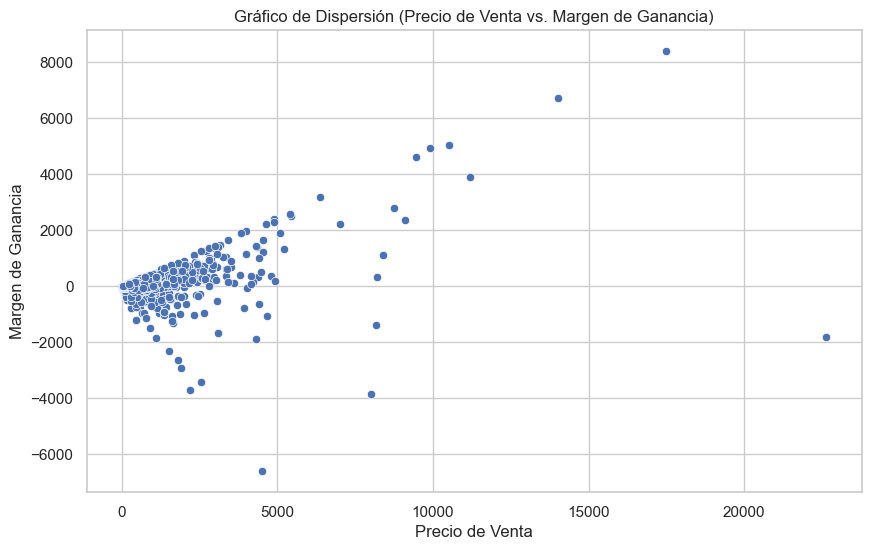

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Ventas", y="Ganancias", data=df_DataSet)
plt.title("Gráfico de Dispersión (Precio de Venta vs. Margen de Ganancia)")
plt.xlabel("Precio de Venta")
plt.ylabel("Margen de Ganancia")
plt.show()

In [10]:
correlation = df_DataSet["Ventas"].corr(df_DataSet["Ganancias"])
print(f"Coeficiente de Correlación: {correlation}")

Coeficiente de Correlación: 0.4790643497377063


In [11]:
X = df_DataSet['Ventas']  #V.  independiente
y = df_DataSet['Ganancias']  #V. dependiente
X = sm1.add_constant(X)

modelo = sm1.OLS(y, X)
resultados = modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:              Ganancias   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     2976.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:58:45   Log-Likelihood:                -67409.
No. Observations:                9994   AIC:                         1.348e+05
Df Residuals:                    9992   BIC:                         1.348e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.7329      2.192     -5.808      0.0

El gráfico de dispersión muestra una relación positiva entre las ventas y las ganancias, lo que significa que a medida que aumentan las ventas, también aumentan las ganancias. Esto tambien se refleja en el coeficiente de correlación de 0.479, que indica una correlación positiva moderada entre las dos variables.

- El coeficiente de ventas es 0.1801, lo que significa que, un aumento de una unidad en las ventas se asocia con un aumento de 0.1801 unidades en las ganancias.

- El término constante es -12.7329, que representa el valor de las ganancias cuando las ventas son cero.

- El valor R-squared es 0.230, lo que indica que alrededor del 23% de la variación en las ganancias se explica por la variación en las ventas. Esto significa que el modelo captura parte de la relación entre las dos variables, pero aún queda una cantidad significativa de variación sin explicar.

- El valor F-statistic es 2976 y su p-valor es muy cercano a cero, lo que indica que el modelo es estadísticamente significativo en general.